# Statistics Mini Project

1. Perform the following statistical analysis on the fifa world cup dataset. The dataset consists of player information which includes height, weight overall rating, potential etc. Data Cleaning and basic EDA process needs to be performed.

###### Importing the required libraries.

In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
from scipy import stats
from statsmodels.stats import weightstats as stests
from scipy.stats import shapiro

%config Completer.use_jedi = False

###### Reading the Dataset

In [77]:
df = pd.read_csv('fifa_stats.csv')
df.head()

,Name,Age,Nationality,Overall_rating,Potential,Club,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Position,Jersey Number,Height,Weight
0,L. Messi,31,Argentina,94,94,FC Barcelona,Left,5,4,4,Medium/ Medium,RF,10,5.583333,159
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,Right,5,4,5,High/ Low,ST,7,6.166667,183
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,Right,5,5,5,High/ Medium,LW,10,5.750000,150
3,De Gea,27,Spain,91,93,Manchester United,Right,4,3,1,Medium/ Medium,GK,1,6.333333,168
4,K. De Bruyne,27,Belgium,91,92,Manchester City,Right,4,5,4,High/ High,RCM,7,5.083333,154


###### Checking Percentage of Null values in the DataSet

In [78]:
print('% of Null values in each column is: ')
(df.isnull().sum()/len(df)) * 100

% of Null values in each column is: 


Name                        0.00
Age                         0.00
Nationality                 0.00
Overall_rating              0.00
Potential                   0.00
Club                        0.95
Preferred Foot              0.00
International Reputation    0.00
Weak Foot                   0.00
Skill Moves                 0.00
Work Rate                   0.00
Position                    0.00
Jersey Number               0.00
Height                      0.00
Weight                      0.00
dtype: float64

Since there are no significant null vlaues in the data set, handling of null values can be ignored

###### checking the skewness of all the numerical columns to remove the outliers.

<Figure size 700x500 with 0 Axes>

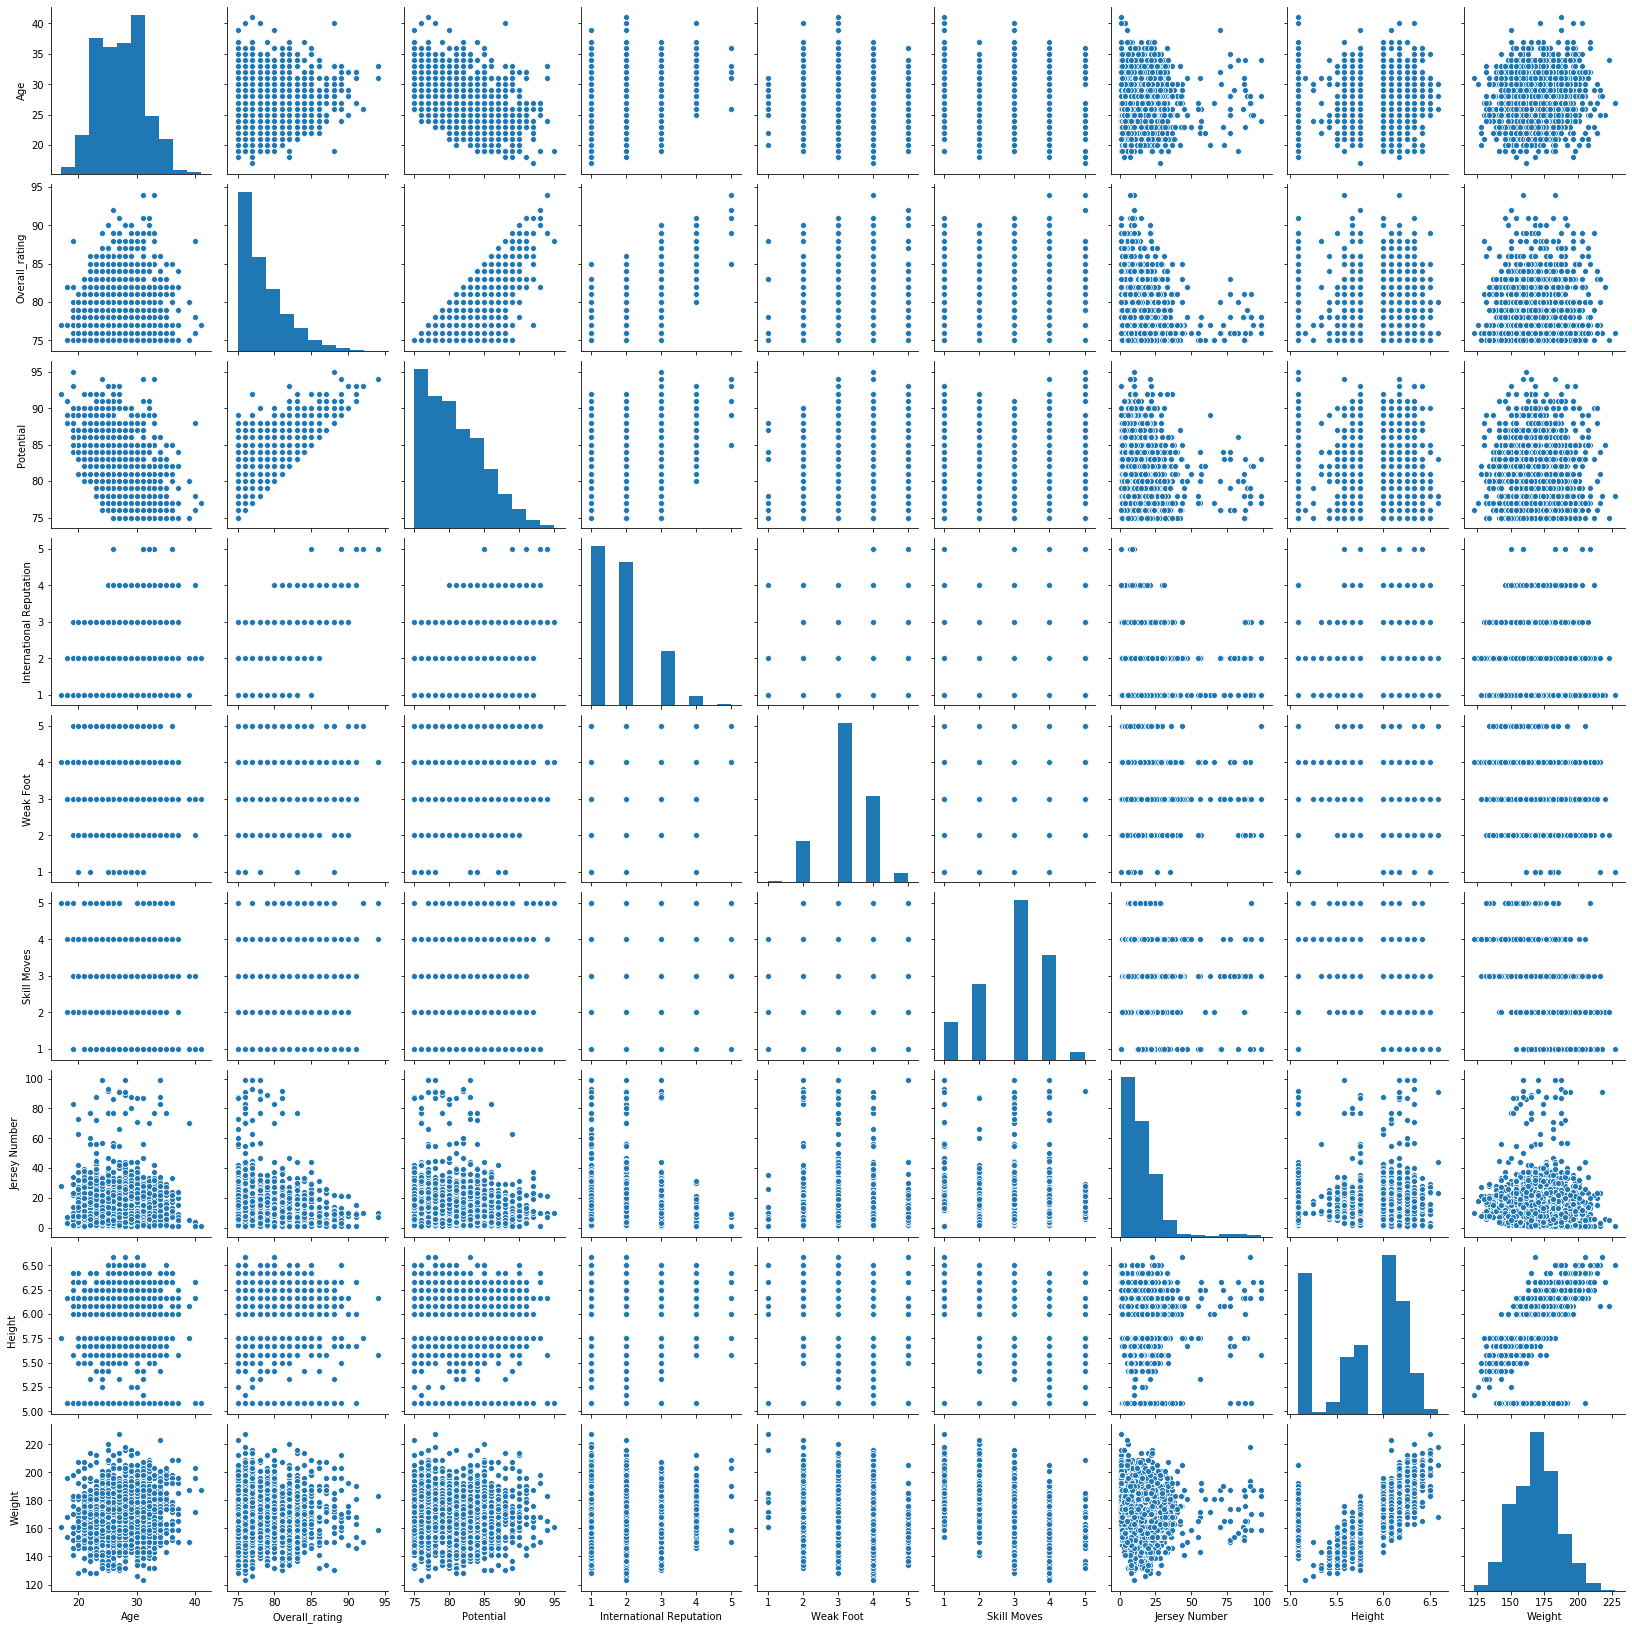

In [79]:
plt.figure(figsize = (7,5),dpi = 100)
sns.pairplot(df)
plt.show()

From the above pair plot we see that almost all the numerical values have high skewness showing hte presence of ouliers in them, hence outlier treatment has to be done on all the values.

###### Removing the outliers from all the numerica columns, also removing outliers based on IQR

In [80]:
for col in df.columns:
    if((df[col].dtype == 'int64') | (df[col].dtype == 'float64')):
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        ll = q1 - 1.5 * iqr
        ul = q3 + 1.5 * iqr
        print('No of outliers in ',col,' are: ',len(df[(df[col] < ll) | (df[col] > ul)]))
        print('removing the outliers: ')
        df = df[(df[col] > ll) & (df[col] < ul)]

No of outliers in  Age  are:  4
removing the outliers: 
No of outliers in  Overall_rating  are:  54
removing the outliers: 
No of outliers in  Potential  are:  1
removing the outliers: 
No of outliers in  International Reputation  are:  23
removing the outliers: 
No of outliers in  Weak Foot  are:  9
removing the outliers: 
No of outliers in  Skill Moves  are:  0
removing the outliers: 
No of outliers in  Jersey Number  are:  55
removing the outliers: 
No of outliers in  Height  are:  0
removing the outliers: 
No of outliers in  Weight  are:  5
removing the outliers: 


###### Plotting a pairplot to check the normality,after removing the outliers

<Figure size 1000x700 with 0 Axes>

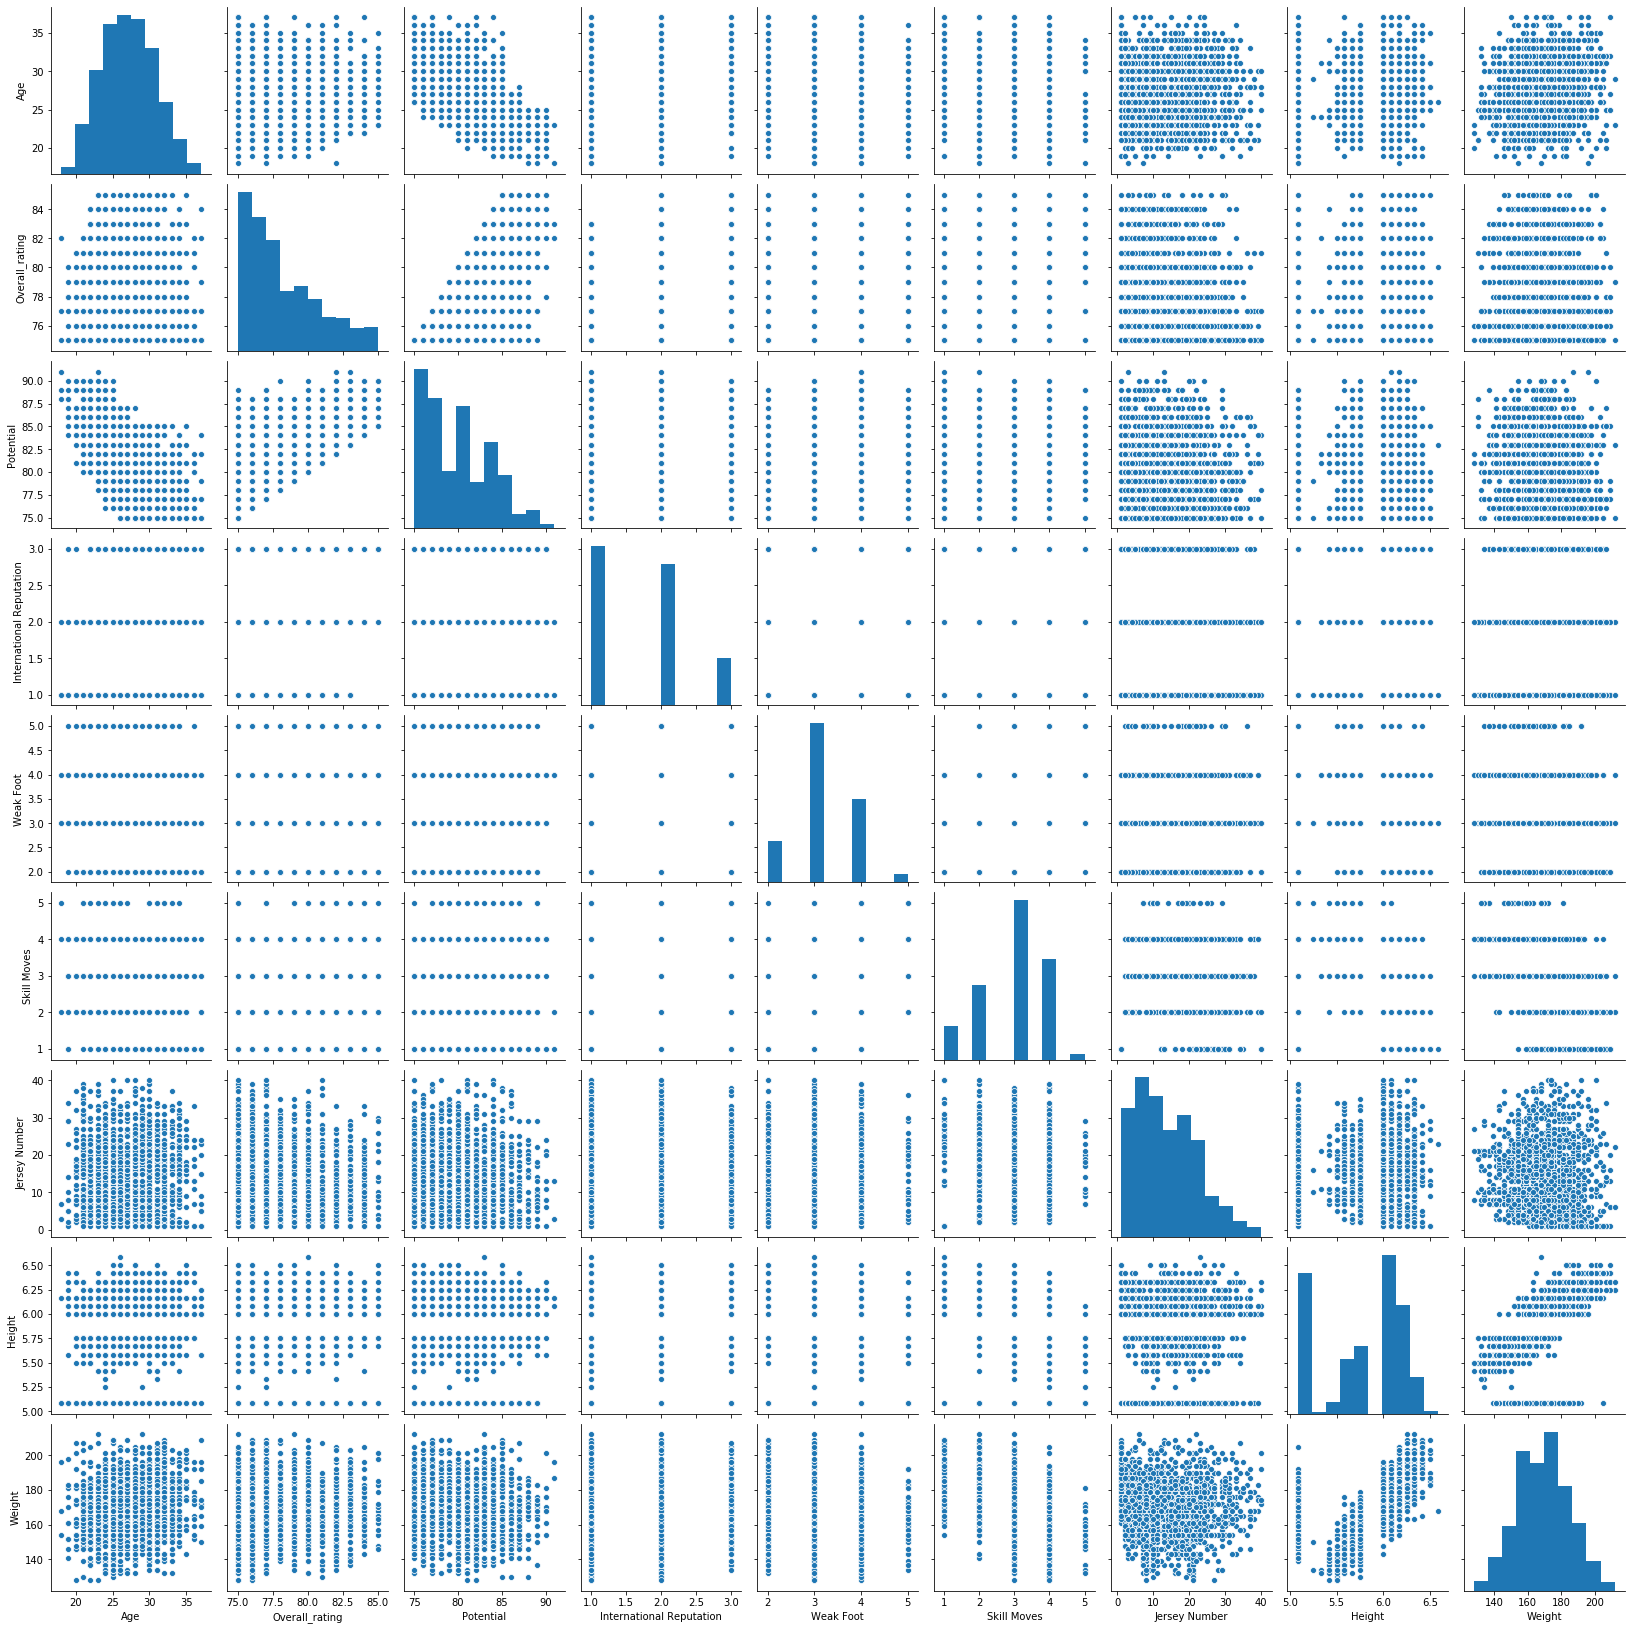

In [81]:
plt.figure(figsize = (10,7),dpi = 100)
sns.pairplot(df)
plt.show()

###### Dropping the duplicate rows from the DataSet

In [82]:
df = df.drop_duplicates()
df

,Name,Age,Nationality,Overall_rating,Potential,Club,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Position,Jersey Number,Height,Weight
78,S. MilinkoviÄ‡-SaviÄ‡,23,Serbia,85,90,Lazio,Right,2,4,4,High/ Medium,CM,21,6.250000,168
80,N. Fekir,24,France,85,89,Olympique Lyonnais,Left,3,3,4,High/ Medium,CAM,18,5.666667,165
81,Alisson,25,Brazil,85,90,Liverpool,Right,3,3,1,Medium/ Medium,GK,13,6.250000,201
82,J. Kimmich,23,Germany,85,88,FC Bayern MÃ¼nchen,Right,3,4,3,High/ Low,RCM,18,5.750000,154
83,SaÃºl,23,Spain,85,90,AtlÃ©tico Madrid,Left,3,4,3,High/ High,RCM,6,6.000000,170
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,G. Herrera,26,Argentina,75,78,Club AtlÃ©tico Talleres,Left,1,2,1,Medium/ Medium,GK,22,6.166667,185
1995,R. BorrÃ©,22,Colombia,75,82,River Plate,Right,1,3,4,High/ Medium,RS,19,5.750000,157
1997,A. Elis,22,Honduras,75,82,Houston Dynamo,Right,1,4,4,High/ Medium,RM,17,5.083333,170
1998,M. FernÃ¡ndez,32,Chile,75,75,Club Necaxa,Right,2,4,5,Medium/ Medium,LDM,14,5.083333,159


### a) Assuming age as population, perform the central limit theorem with sample size of 200. Find the standard error and the mean of sampling distribution. Compare the results with population mean and standard deviation. Explain in non-technical terms why the estimated standard error of a sample mean tends to decrease with an increase in sample size### 

In [83]:
pop_mean = np.mean(df['Age'])
pop_std = np.std(df['Age'])

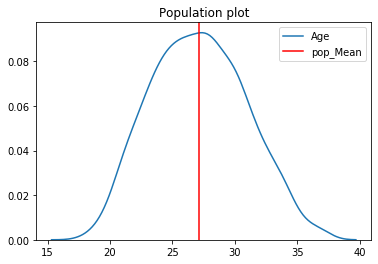

In [84]:
sns.kdeplot(df['Age'])
plt.title('Population plot')
plt.axvline(pop_mean,color = 'red',label = 'pop_Mean')
plt.legend()

Extracting sample set of size 200 for age

In [85]:
samp_age = df['Age'].sample(200)

calculating the mean and standard deviation for the sample

In [86]:
samp_mean = np.mean(samp_age)
samp_std = np.std(samp_age)/np.sqrt(200)

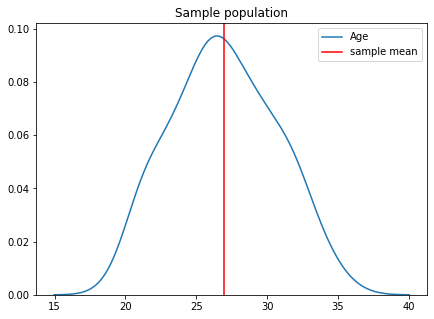

In [87]:
plt.figure(figsize = (7,5))
sns.kdeplot(samp_age)
plt.title('Sample population')
plt.axvline(samp_mean,color = 'red',label = 'sample mean')
plt.legend()

In [88]:
print('Population mean : ',pop_mean)
print('Population standard deviation: ',pop_std)
print('Sample mean: ',samp_mean)
print('Sample standard deviation: ',samp_std)

Population mean :  27.131898454746135
Population standard deviation:  3.7809412458963583
Sample mean:  26.965
Sample standard deviation:  0.25868682803730064


### b) Is there any evidence that the players overall rating is greater than 80?b) Is there any evidence that the players overall rating is greater than 80?

###### Normality check
H0 : Data is normal
H1 : data is not normal

In [89]:
stat1b,pval1b = shapiro(df['Overall_rating'])
print(pval1b)

5.303289829426531e-35


p_value is < 0.05 so null hypothesis is rejected, non-parmetric test is applied to proceed that is Wilcoxon

###### H0 : median of rating is <= 80 , H1 : median of rating is > 80

In [90]:
stats.wilcoxon(df['Overall_rating'] - 80,alternative='greater')

WilcoxonResult(statistic=159252.0, pvalue=1.0)

Since p_value is > 0.05 we fail to reject null hypothesis, hence rating not greater than 80

### c) Perform the statistical test to identify whether preferred foot has any impact on potential. Also, perform the graphical analysis.

In [91]:
right = df[df['Preferred Foot']=='Right']['Potential']
left = df[df['Preferred Foot']=='Left']['Potential']

###### Normality Check, H0 : data is not normal  H1: data is not normal

In [92]:
stat1c,pvalue1c = shapiro(df['Potential'])
print(pvalue1c)

4.3090691864473884e-26


p_value is < 0.05 so null hypothesis is rejected, so we apply non parametric test. That is ManWhitneyu, because the 2 samples are unpaired

H0: Preferred foot has nno impact on potential
H1: Preferred foot has impact on potential

In [93]:
sta1c,pval1c = stats.mannwhitneyu(right,left,alternative='two-sided')
print(pval1c)

0.20969267302434935


p_value > 0.05 so we fail to reject null. Hence preferred foor has no impact on the potential

### d) Perform the statistical test to identify the relation between the overall rating and potential. [Assume both are continuous data points].

Normality Check
H0 : Data is normal
H1 : Data is not normal

In [94]:
stat1d,pvalue1d = shapiro(df['Potential'])
print(pvalue1d)
stat1dd,pvalue1dd = shapiro(df['Overall_rating'])
print(pvalue1dd)

4.3090691864473884e-26
5.303289829426531e-35


p_value for both is < 0.05 so nuull hypothesis is rejected, so we apply non-parametric test that is manwhitneyu

H0: Overall rating has no impact on the potential
H1: Overall rating foot has impact on potential

In [95]:
sta1d,pval1d = stats.mannwhitneyu(df['Potential'],df['Overall_rating'],alternative='two-sided')
print(pval1d)

3.764606034123456e-71


Since p_value < 0.05, we reject null hypothesis and conclude that overall rating effects the potential of the player

###### e) Does skill move have any effect in overall rating. Perform the graphical analysis and the statistical analysis.

Checking the no: of categories on skill moves

In [96]:
len(df['Skill Moves'].unique())

5

Normality Check
H0: Data is normal
H1: Data is not normal

In [97]:
stat1e,pvalue1e = shapiro(df['Overall_rating'])
print(pvalue1e)

5.303289829426531e-35


p_value is < 0.05 so null hypothesis is rejected and we apply non-parametric test. So we apply Kruskal test since there are more than 5 categories

In [98]:
skill_one=df[df['Skill Moves']==1]['Overall_rating']
skill_two=df[df['Skill Moves']==2]['Overall_rating']
skill_three=df[df['Skill Moves']==3]['Overall_rating']
skill_four=df[df['Skill Moves']==4]['Overall_rating']
skill_five=df[df['Skill Moves']==5]['Overall_rating']

H0: Mean ranks of the categories are all the same.
H1: Mean ranks of the categories are not the same.

In [99]:
sk,pk = stats.kruskal(skill_one,skill_two,skill_three,skill_four,skill_five)
print(pk)

2.1667111658050466e-15


pvalue < 0.05 so the null hypothesis is rejected

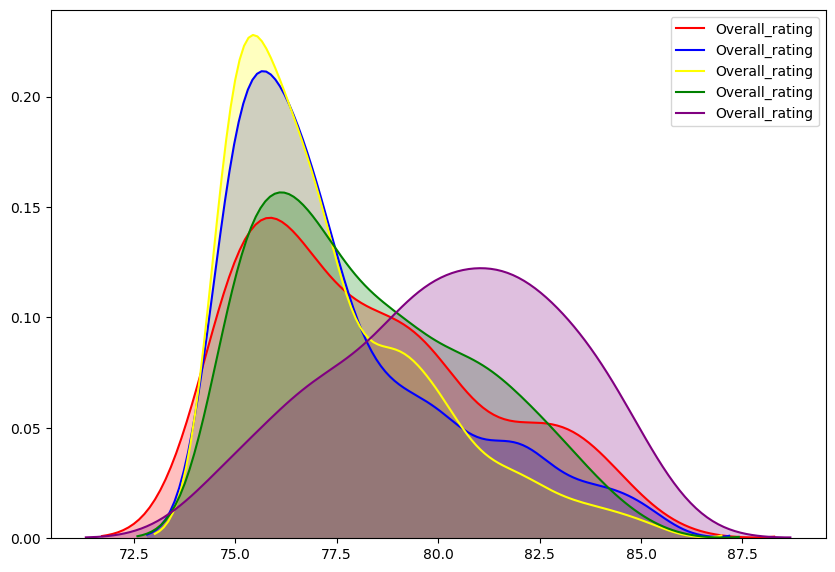

In [100]:
plt.figure(figsize = (10,7),dpi = 100)
sns.kdeplot(skill_one,shade=True,color='red')
sns.kdeplot(skill_two,shade=True,color='blue')
sns.kdeplot(skill_three,shade=True,color='yellow')
sns.kdeplot(skill_four,shade=True,color='green')
sns.kdeplot(skill_five,shade=True,color='purple')
plt.show()

As we see the 5 skills move do make a diffrence

## 2. Perform the following statistical analysis on the mobile network dataset given. The given data set contains information about the internet, calls, messages of various network. Data Cleaning and basic EDA process needs to be performed.

In [101]:
df1 = pd.read_csv('phone.csv')
df1.head()

,date,duration,item,month,network,network_type
0,15-10-14 6:58,221.321120,data,2014-11,data,data
1,15-10-14 6:58,81.610599,call,2014-11,Vodafone,mobile
2,15-10-14 14:46,143.109111,call,2014-11,Meteor,mobile
3,15-10-14 14:48,111.888670,call,2014-11,Tesco,mobile
4,15-10-14 17:27,246.695171,call,2014-11,Tesco,mobile


In [102]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 820 entries, 0 to 819
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          820 non-null    object 
 1   duration      820 non-null    float64
 2   item          820 non-null    object 
 3   month         820 non-null    object 
 4   network       820 non-null    object 
 5   network_type  820 non-null    object 
dtypes: float64(1), object(5)
memory usage: 38.6+ KB


Checking the percentage of null values in the Dataset

In [103]:
print('% of Null values in each column is: ')
(df1.isnull().sum()/len(df1)) * 100

% of Null values in each column is: 


date            0.0
duration        0.0
item            0.0
month           0.0
network         0.0
network_type    0.0
dtype: float64

Since there are no null-vales the removal of null values can be ignored

Checking the Skewness of the numerical columns to remove the outliers

<Figure size 700x500 with 0 Axes>

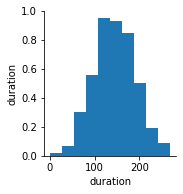

In [104]:
plt.figure(figsize = (7,5),dpi = 100)
sns.pairplot(df1)
plt.show()

Removing the otliers from the numerical columns

In [105]:
for col in df1.columns:
    if((df1[col].dtype == 'int64') | (df1[col].dtype == 'float64')):
        q1 = df1[col].quantile(0.25)
        q3 = df1[col].quantile(0.75)
        iqr = q3 - q1
        ll = q1 - 1.5 * iqr
        ul = q3 + 1.5 * iqr
        print('No of outliers in ',col,' are: ',len(df1[(df1[col] < ll) | (df1[col] > ul)]))
        print('removing the outliers: ')
        df = df1[(df1[col] > ll) & (df1[col] < ul)]

No of outliers in  duration  are:  3
removing the outliers: 


Dropping the duplicate rows from the dataset

In [106]:
df = df.drop_duplicates()
df

,date,duration,item,month,network,network_type
0,15-10-14 6:58,221.321120,data,2014-11,data,data
1,15-10-14 6:58,81.610599,call,2014-11,Vodafone,mobile
2,15-10-14 14:46,143.109111,call,2014-11,Meteor,mobile
3,15-10-14 14:48,111.888670,call,2014-11,Tesco,mobile
4,15-10-14 17:27,246.695171,call,2014-11,Tesco,mobile
...,...,...,...,...,...,...
815,10-03-15 6:58,185.328156,data,2015-03,data,data
816,11-03-15 6:58,89.819383,data,2015-03,data,data
817,12-03-15 6:58,117.604998,data,2015-03,data,data
818,13-03-15 0:39,77.834006,sms,2015-03,Vodafone,mobile


###### a) With 95% & 99% Confidence Interval find the range estimate of average duration calls made by all the network. Which of the Intervals are wider? Interpret the results.

In [107]:
pop_mean=df['duration'].mean()
pop_std=df['duration'].std()
print('For 95% confidence level :',stats.norm.interval(0.95,loc=pop_mean,scale=pop_std/np.sqrt(820)))
print('For 99% confidence level :',stats.norm.interval(0.99,loc=pop_mean,scale=pop_std/np.sqrt(820)))

For 95% confidence level : (141.71393626028265, 147.8795821661435)
For 99% confidence level : (140.7452430820762, 148.84827534434996)


The interval of 99% is more than 95% which means it has more
share of data and that the probability of finding the values is more in 99% interval

###### b) Perform statistical analysis to check whether the networks are equally distributed in the dataset.###### 

In [108]:
df['network_type'].unique()

array(['data', 'mobile', 'voicemail', 'landline'], dtype=object)

In [109]:

df1=df[(df['network']!='data') & (df['network']!='voicemail') & (df['network']!='landline') ]

Because they are network types so incorrect data entry

Data is chategorical so we perform chisquare goodness of fit test

In [110]:
df1['network'].value_counts()

Vodafone    215
Three       213
Meteor       87
Tesco        84
Name: network, dtype: int64

In [111]:
exp=[150,150,150,150]
obs=[215,215,87,84]

H0: Observer = Expected
H1: Observed != Expected

In [112]:
stats.chisquare(f_obs=obs,f_exp=exp)

Power_divergenceResult(statistic=111.83333333333334, pvalue=4.4234236034796116e-24)

P value < 0.05. Meaning not equally distributed in data set

###### c) Plot the distribution of duration with respect to each network in the same graph and Interpret the results from the graph.

In [113]:
three=df1[df1['network']=='Three']['duration']
voda=df1[df1['network']=='Vodafone']['duration']
meteor=df1[df1['network']=='Meteor']['duration']
tesco=df1[df1['network']=='Tesco']['duration']

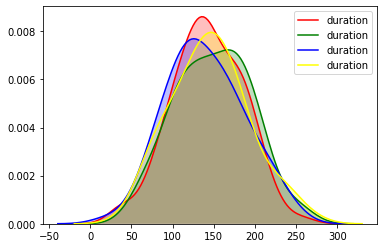

In [114]:
sns.kdeplot(three,shade=True,color='red')
sns.kdeplot(voda,shade=True,color='green')
sns.kdeplot(meteor,shade=True,color='blue')
sns.kdeplot(tesco,shade=True,color='yellow')

The distribution of duration of every network is over lapping. So the the network has no effect on duration.

###### d) Perform statistical tests to identify the relation between item and duration. Detailed explanation of relation between the classes is required.###### d) Perform statistical tests to identify the relation between item and duration. Detailed explanation of relation between the classes is required.

In [115]:
df1['item'].unique()

array(['call', 'sms'], dtype=object)

Normality check
H0: data is normal
H1: data is not normal

In [116]:
shapiro(df1['duration'])

(0.9969807863235474, 0.33256953954696655)

p_value is > 0.05 so the data is normal

In [117]:
call=df1[df1['item']=='call']['duration']
sms=df1[df1['item']=='sms']['duration']

Equal variance check:
H0: All variables are same
H1: Atleast one variance is diffrent

In [118]:
stats.levene(call,sms)

LeveneResult(statistic=0.6441868403744954, pvalue=0.4225181290364397)

P_vale is > 0.05 so variance same so we can apply ttest

H0: Duration is same for all calls
H1: Duration is not the same for all the calls

In [119]:
stats.ttest_ind(call,sms)

Ttest_indResult(statistic=1.5624221995503653, pvalue=0.11871846848770258)

P_value > 0.05 so we fail to reject null hypothesis. duration is same for all the calls and item

###### e) Perform statistical tests to identify the relation between network and network_type.

Chi-Squared test for independence
H0: No Association between network and network name
H1: There is association between network and network name

In [120]:
cont_tab=pd.crosstab(df1['network'],df1['network_type'])
cont_tab

network_type,mobile
network,
Meteor,87
Tesco,84
Three,213
Vodafone,215


In [121]:
s,p_val,d,arr=stats.chi2_contingency(cont_tab)
print(p_val)

1.0


p_value > 0.05 so we fail to reject null hypothesis. There is association in network and network type